Importing  basic initial Library 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [67]:
from sklearn.model_selection import train_test_split , RandomizedSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Data collection

In [68]:
dataset = pd.read_csv("E:\Autism.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\HP\AppData\Local\Temp\ipykernel_6816\1316300714.py:1: SyntaxWarning: invalid escape sequence '\A'
  dataset = pd.read_csv("E:\Autism.csv")


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

Converting floating point number to integer

In [70]:
dataset["age"]=dataset["age"].astype(int)

In [71]:
for col in dataset.columns:
   numerical_data=["ID","age","result"]
   if col not in numerical_data:
       print(col," ",dataset[col].unique())

A1_Score   [1 0]
A2_Score   [0 1]
A3_Score   [1 0]
A4_Score   [0 1]
A5_Score   [1 0]
A6_Score   [0 1]
A7_Score   [1 0]
A8_Score   [0 1]
A9_Score   [1 0]
A10_Score   [1 0]
gender   ['f' 'm']
ethnicity   ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice   ['no' 'yes']
austim   ['no' 'yes']
contry_of_res   ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burund

Droping age and id column

In [72]:
dataset = dataset.drop(columns=["ID","age_desc"])
dataset.shape

(800, 20)

Replacing columns

In [73]:
country_map={
    "VietNam":"VietNam",
    "Hong Kong":"China",
    "AmericanSamoa":"United States"
}
dataset["contry_of_res"]=dataset["contry_of_res"].replace(country_map)
dataset["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

dataset["Class/ASD"].value_counts()

EXPLORATORY DATA ANALYTIC

In [74]:
dataset.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


UNIVERIENT ANALYSIS

For Numerical Data

Mean of age  27.96375
Medial of the age  24.0


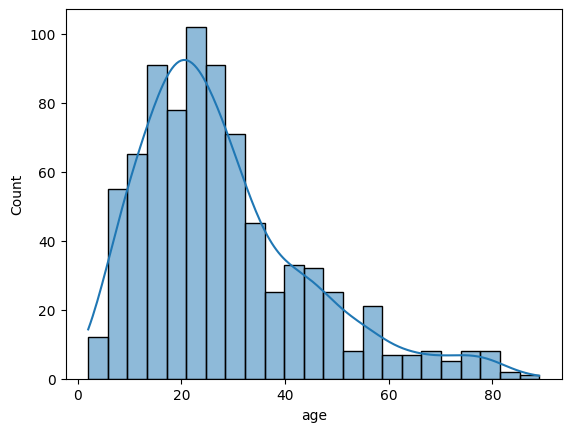

In [75]:
print("Mean of age ", dataset["age"].mean())
print("Medial of the age ", dataset["age"].median())
sns.histplot(data=dataset["age"],kde=True)
plt.show()
# Right Skew

In [76]:
# for tree outlier not effect but in linear method it effect more
print("Mean of Result ",dataset["result"].mean())
print("Median of Result ",dataset["result"].median())

Mean of Result  8.537303106501248
Median of Result  9.605299308


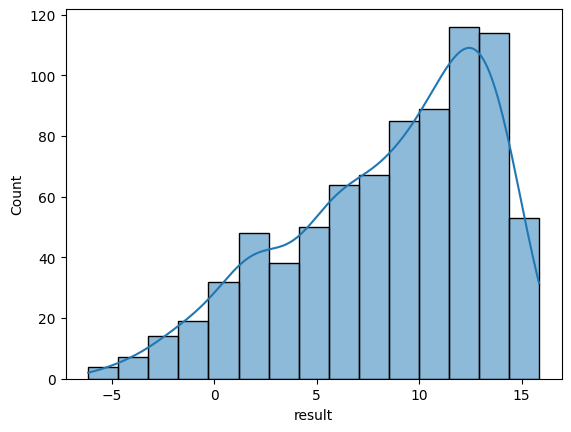

In [77]:
sns.histplot(data=dataset["result"],kde=True)
plt.show()
# Left skew

In [78]:
#Counting outlier in age and result using IQR
Q1=dataset["age"].quantile(0.25)
Q3=dataset["age"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1 - 1.5*IQR
upper_bound=Q3 + 1.5*IQR
age_outlier=dataset[(dataset["age"]<lower_bound) | (dataset["age"]>upper_bound)]
print("Age outliers are ",len(age_outlier))

Age outliers are  39


In [79]:
#Counting outlier in age and result using IQR
Q1=dataset["result"].quantile(0.25)
Q3=dataset["result"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1 - 1.5*IQR
upper_bound=Q3 + 1.5*IQR
result_outlier=dataset[(dataset["result"]<lower_bound) | (dataset["result"]>upper_bound)]
print("result outliers are ",len(result_outlier))

result outliers are  1


In [80]:
dataset.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

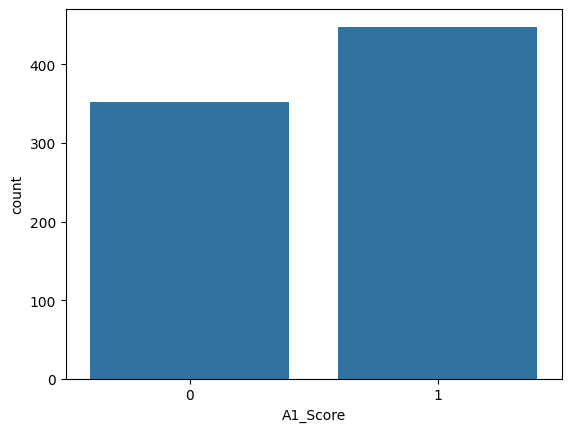

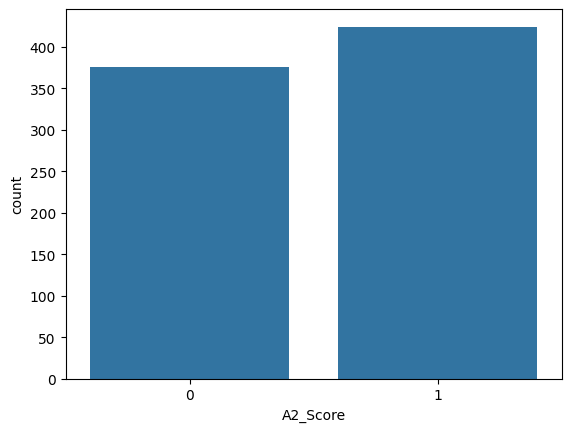

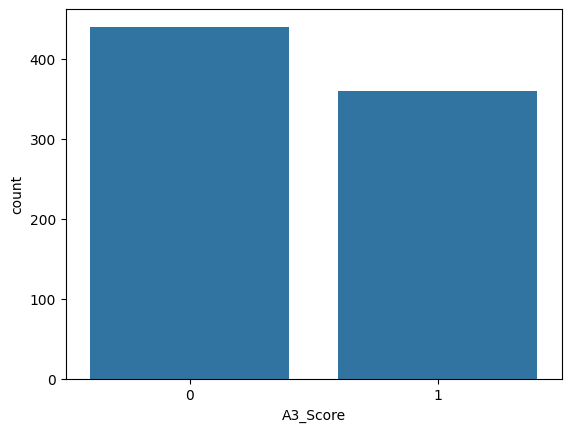

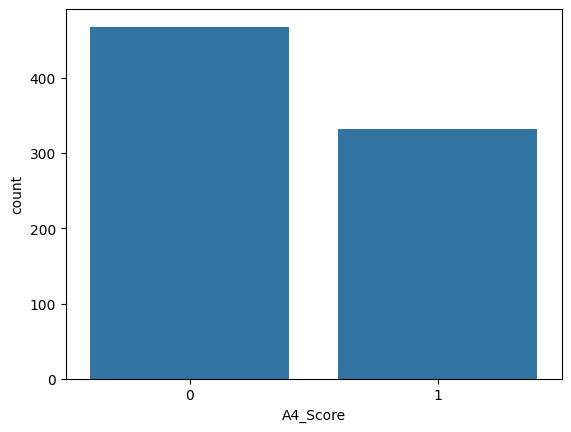

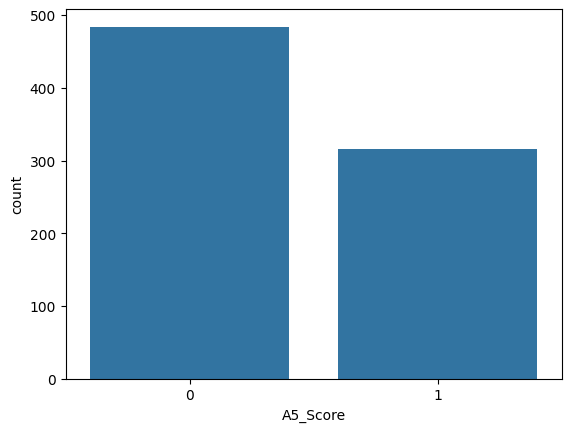

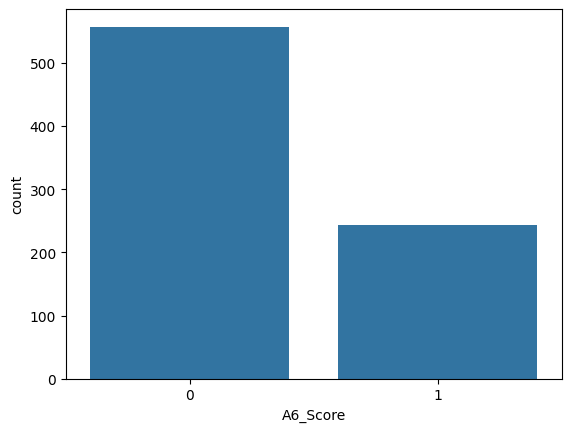

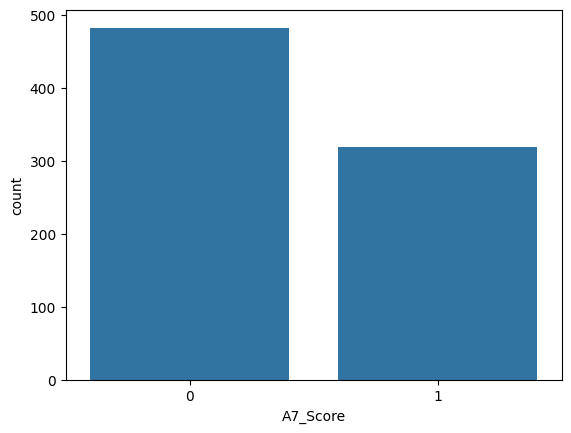

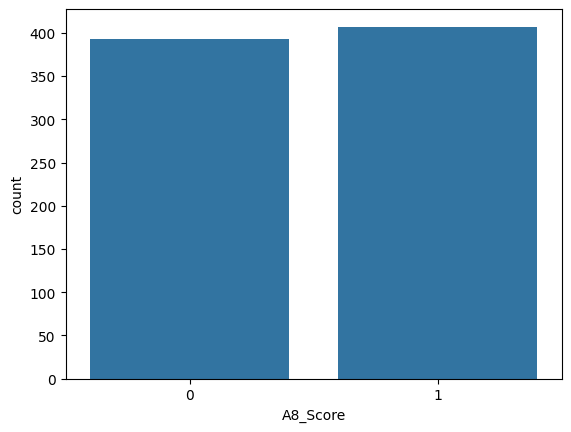

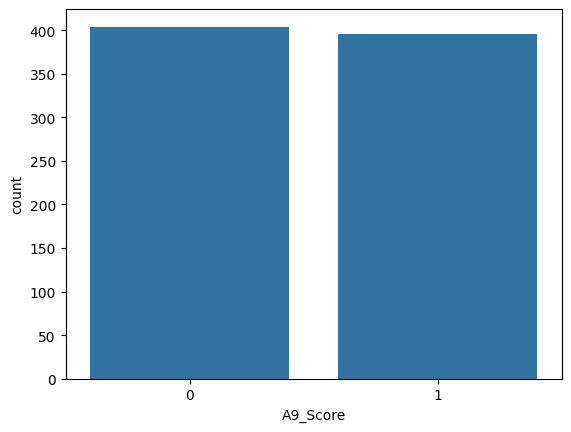

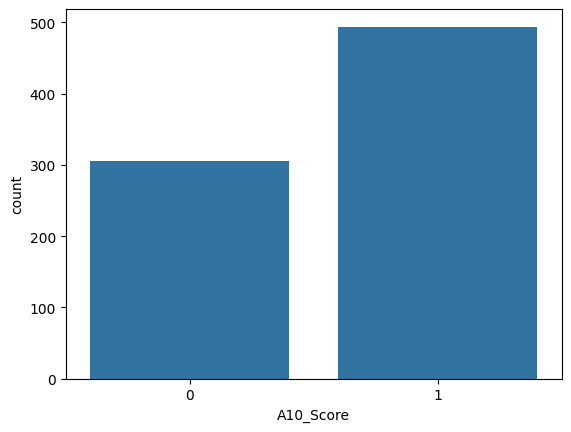

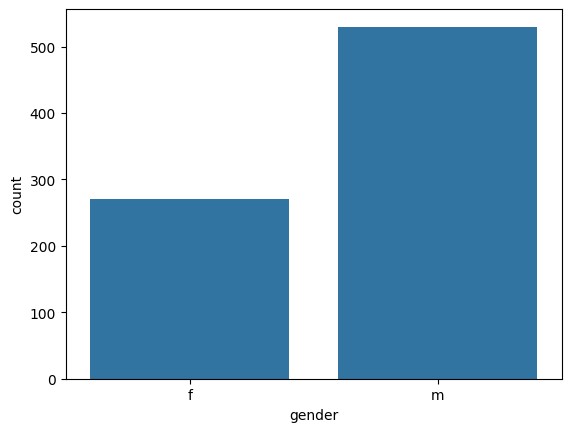

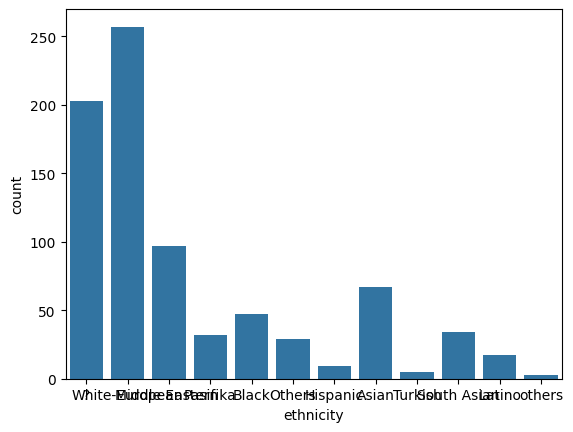

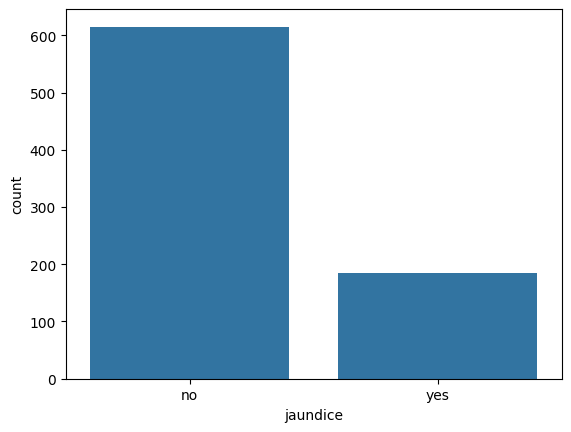

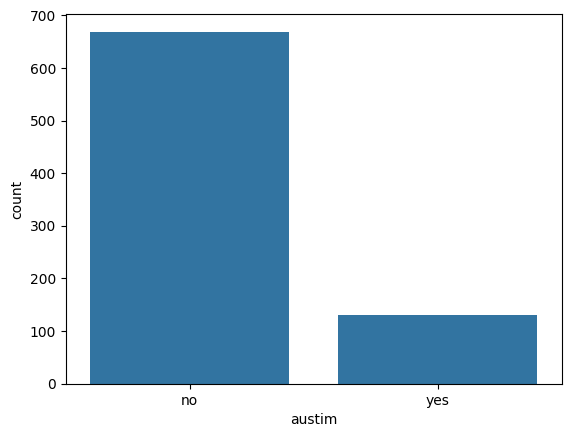

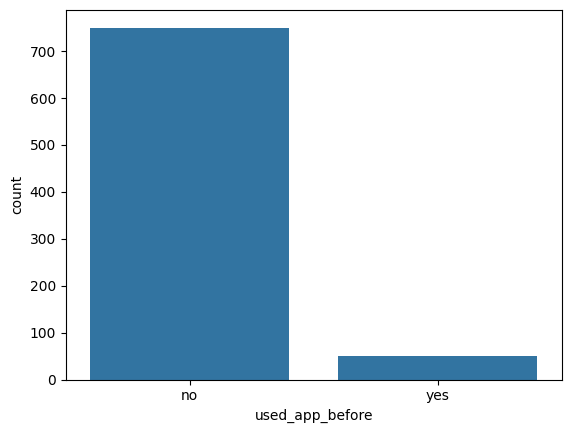

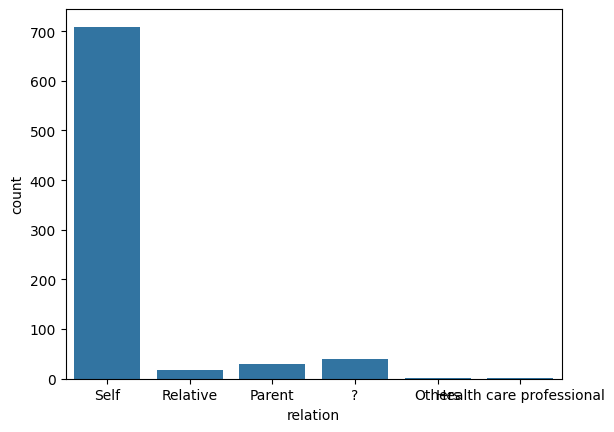

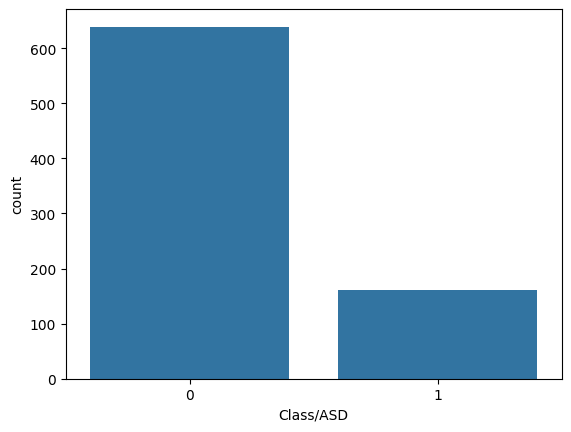

In [81]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'used_app_before', 'relation', 'Class/ASD']
for col in categorical_columns:
    sns.countplot(x=dataset[col])
    plt.show()

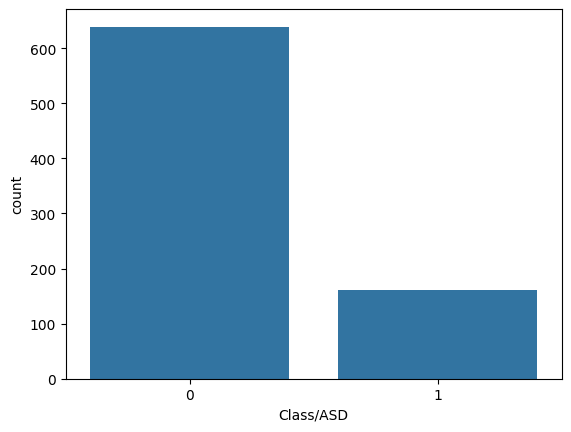

In [82]:
# count plot for target plot
sns.countplot(x=dataset["Class/ASD"])
plt.show()

Handling missing categorical data

In [83]:
dataset["ethnicity"]=dataset["ethnicity"].replace({
    "?":"others",
    "others":"Others"
})
dataset["relation"]=dataset["relation"].replace({
    "?":"Others"
})
dataset["ethnicity"].unique()
dataset["relation"].unique()

array(['Self', 'Relative', 'Parent', 'Others', 'Health care professional'],
      dtype=object)

Label Encoding

In [84]:
# indentify Object Columns 
object_columns=dataset.select_dtypes(include=["object"]).columns
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [85]:
#storing the encoders
encoders={}
for col in object_columns:
   Le=LabelEncoder()
   dataset[col]=Le.fit_transform(dataset[col])
   encoders[col]=Le

In [86]:
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,10,0,0,6,0,6.351166,4,0
1,0,0,0,0,0,0,0,0,0,0,47,1,10,0,0,23,0,2.255185,4,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,4,1
3,0,0,0,0,0,0,0,0,0,0,23,0,10,0,0,52,0,2.276617,4,0
4,0,0,0,0,0,0,0,0,0,0,43,1,10,0,0,44,0,-4.777286,4,0


BiVarient Analysis

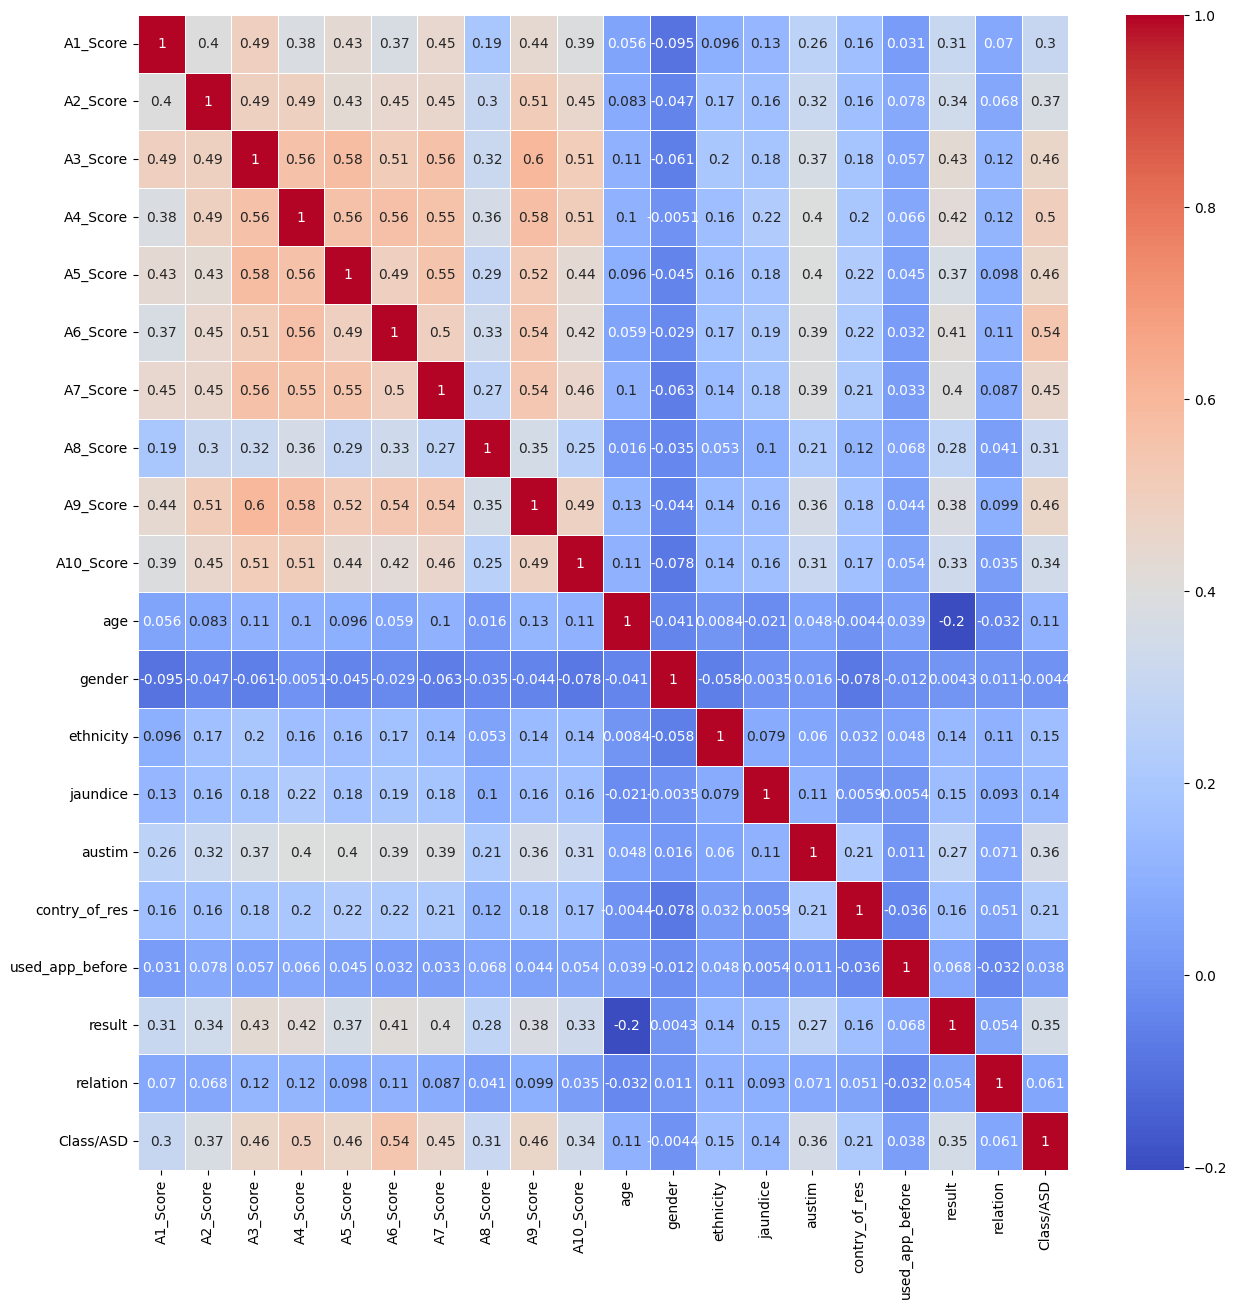

In [87]:
# correlation among the features
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
# No need of feature removal

DATA PREPROCESSING 

In [88]:
# replacing the outlier with the median of the data
def replace_outlier_median(df,column):
    median=df[column].median()
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-IQR
    upper_bound=Q3+IQR
    df[column]=df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df

dataset= replace_outlier_median(dataset,"age")
dataset= replace_outlier_median(dataset,"result")


TRAIN TEST SPLIT

In [89]:
input_data=dataset.iloc[:,:-1]
output_data=dataset["Class/ASD"]

In [90]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2)
x_test.shape

(160, 19)

CLASS IMBALANCE HANDALING IN TRAINING DATA

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
smote=SMOTE(random_state=42)
x_train_reshape , y_train_reshape=smote.fit_resample(x_train,y_train)

In [93]:
y_train_reshape.value_counts()

Class/ASD
0    514
1    514
Name: count, dtype: int64

In [94]:
x_train=x_train_reshape
y_train=y_train_reshape

MODEL TRAINING

In [95]:
# Decision Tree Clasifier

In [96]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(x_train,y_train)
DTC_SCORE=DTC.score(x_test,y_test)*100
print("Decision Tree score is ",DTC_SCORE)

Decision Tree score is  75.0


In [97]:
# Random forest classifier

In [98]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [99]:
RFC_SCORE=RFC.score(x_test,y_test)*100
print("Random Forest Score is ",RFC_SCORE)

Random Forest Score is  81.25


HYPER PARAMETER TUNING

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
#Decision Tree
parameter={
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    "max_depth":[10,20,30,40,50,60,70],
    "max_features":["sqrt", "log2"],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}
DTC_TEST=DecisionTreeClassifier()
DTC2 = GridSearchCV(DTC_TEST,parameter,cv=5)

In [103]:
DTC2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [65]:
DTC2_SCORE=DTC2.score(x_test,y_test)*100
print("Decision tree with hyperparameter score is ",DTC2_SCORE)

Decision tree with hyperparameter score is  78.75


In [66]:
print(DTC2.best_params_)

{'criterion': 'log_loss', 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [67]:
parameter_rf={
    "n_estimators":[50,100,200,500],
    "criterion":["gini", "entropy", "log_loss"],
    "max_depth":[10,20,30,40,50,60,70],
    "max_features":["sqrt", "log2"],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}
RFC_TEST=RandomForestClassifier()
RFC2 = RandomizedSearchCV(RFC_TEST,parameter_rf)

In [68]:
RFC2.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]})

In [69]:
RFC2_SCORE=RFC2.score(x_test,y_test)*100
print("Random Forest with Hyperparamter score is ",RFC2_SCORE)

Random Forest with Hyperparamter score is  88.125


In [50]:
print(RFC2.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'log_loss'}


Adaboost Boosting algo

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
ADC = AdaBoostClassifier(n_estimators=50,learning_rate=0.5)
ADC.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.5)

In [51]:
adaboost_score=ADC.score(x_test,y_test)*100
print("score of adaboost algorithim is ", adaboost_score)

score of adaboost algorithim is  80.625


Gradiant Boosting Algo

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
GBC = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [55]:
gradiantboosting_score=GBC.score(x_test,y_test)*100
print("Gradient Boosting score is ",gradiantboosting_score)

Gradient Boosting score is  80.0


xgboost algorithim

In [56]:
from xgboost import XGBClassifier

In [57]:
XGB = XGBClassifier()

In [58]:
XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
XGB.score(x_test,y_test)*100

79.375

BEST MODEL IS GRADIANT BOOSTING